In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
# Load in the dataframe
df = pd.read_csv("GEICO_reviews.csv", index_col=0)

In [5]:
df.head()

,Rating,Job Title,Summary,ProComments,ConComments,Status,Location,Advice to Mgmt,City,State
Date,,,,,,,,,,
7/30/18,5,Anonymous Employee,"""Great place to work""",Excellent training and support system.,Hard to not take the work home sometimes,Current Employee,NaN,NaN,NaN,NaN
9/8/18,4,Claims Service Representative,"""Geico Is A Great Company""",The company over all is very amazing. There's ...,It's a bit hard to obtain the other opportunit...,Current Employee,NaN,The needs to be sometime of program in place t...,NaN,NaN
9/6/18,5,Claims Medical Billing,"""Claims/PIP/Medical Billing""",Job security. Amazing benefits. Strong HR pres...,Although the entry level salary is lower compa...,Former Employee,"Buffalo, NY",In my opinion management does a great job. The...,Buffalo,NY
9/4/18,4,CSR-1,"""CSR""",Great discounts on at most Berkshire Hathaway ...,"Repetitive work, tedious tasks, cookie cutter ...",Former Employee,"Dallas, TX",NaN,Dallas,TX
9/5/18,4,Anonymous Employee,"""Great Place to Work w/a few caveats""","Great Pay, Benefits, Gym, Company Get Together...","Micro Manging, Better Sick Day Policies",Current Employee,NaN,ds,NaN,NaN


In [6]:
# One review for word cloud
text = df.ProComments[0]


In [7]:
text

'Excellent training and support system.'

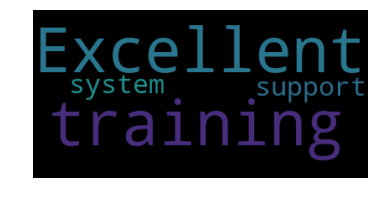

In [8]:
# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
# interpolation is used to smooth out the lettering in the word cloud
plt.axis("off")
# since plotting with matplotlib, don't want to show the axis as if in a chart
plt.show()

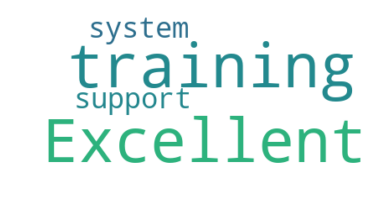

In [9]:
# Can manipulate the cloud with the number of words and coloring.
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
postext = " ".join(review for review in df.ProComments)
print("There are {} words in the combination of all postive reviews".format(len(postext)))

There are 387267 words in the combination of all postive reviews


In [11]:
negtext = " ".join(review for review in df.ConComments)
print("There are {} words in the combination of all negative reviews".format(len(negtext)))

There are 783771 words in the combination of all negative reviews


In [12]:
stopwords = set(STOPWORDS)
stopwords.update(["work", "GEICO", "great"]) 

In [16]:
# Generate a word cloud image
wordcloud_pos = WordCloud(stopwords=stopwords, background_color = "white").generate(postext)

In [17]:
# Generate a word cloud image
wordcloud_neg = WordCloud(stopwords=stopwords, background_color = "white").generate(negtext)

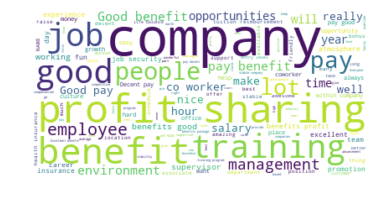

In [19]:
# Display word cloud
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

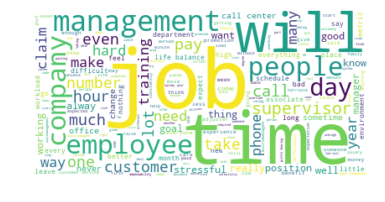

In [20]:
# Display word cloud
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
# Convert image into an array for cloud masking.
gecko_mask = np.array(Image.open("geicogeckoblack.png"))
type(gecko_mask)

numpy.ndarray

In [42]:
wc = WordCloud(background_color = "white", max_words = 1000, mask = gecko_mask, stopwords=stopwords)
# Generate word cloud with mask background.
wc.generate(negtext)

# save image for output
wc.to_file("neggecko.png")



In [21]:
gecko_color_mask = np.array(Image.open("geicogeckocolor.png"))

In [22]:
wordcloud_gecko = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=gecko_color_mask).generate(postext)

In [24]:
wordcloud_gecko.to_file("posgecko_color.png")